## Primeira análise do dado, definição de estratégias, experimentações em geral

In [415]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from typing import Annotated 
from pandas import DataFrame, Timestamp 
import matplotlib.ticker as mticker

from datetime import datetime, timedelta

In [416]:
def jupyter_settings():
    try:
        from IPython import get_ipython
        get_ipython().run_line_magic('matplotlib', 'inline')
        display(HTML('<style>.container { width:90% !important; }</style>'))
    
    except:
        pass  

    pd.set_option('display.float_format', '{:.2f}'.format)
    plt.rcParams['figure.figsize'] = [12, 7]
    plt.rcParams['font.size'] = 24
    pd.set_option('display.max_columns', None)
    pd.set_option('display.max_rows', None)
    pd.set_option('display.expand_frame_repr', False)
    sns.set()
    plt.style.use('ggplot')
    plt.rcParams['font.family'] = 'sans-serif'
    plt.rcParams['font.sans-serif'] = 'Arial'

In [417]:
jupyter_settings()

In [418]:
data = pd.read_csv("../data/dev/sample_case.csv") # -> Dado Transacional

In [419]:
data.head(15)

,data_originacao,id_contrato,id_varejo,identificador_cliente,valor_financiado,prazo,juros_operacao,data_vencimento,data_pagamento,num_parcela,valor_parcela,valor_pago,tipo_cliente,estado
0,2023-08-11,662045,70,12703337,326.85,5,0.06,2023-10-11,2023-09-22,2,77.78,74.92,Recorrente,AM
1,2024-02-01,977143,142,11157708,326.46,7,0.06,2024-04-01,2024-02-27,2,58.67,54.87,Recorrente,AM
2,2024-02-01,977143,142,11157708,326.46,7,0.06,2024-05-01,2024-04-29,3,58.67,58.44,Recorrente,AM
3,2024-02-01,977143,142,11157708,326.46,7,0.06,2024-09-01,2024-08-27,7,58.67,58.09,Recorrente,AM
4,2024-03-21,1069444,63,11350056,401.25,3,0.11,2024-06-21,NaN,3,163.03,NaN,Recorrente,AM
5,2024-04-05,1099287,350,13212879,111.49,4,0.09,2024-05-05,2024-05-07,1,34.04,34.93,Recorrente,BA
6,2024-04-05,1099287,350,13212879,111.49,4,0.09,2024-06-05,2024-06-02,2,34.04,33.76,Recorrente,BA
7,2024-04-05,1099287,350,13212879,111.49,4,0.09,2024-08-05,2024-08-05,4,34.04,34.04,Recorrente,BA
8,2024-04-11,1112229,662,13246578,392.57,5,0.05,2024-05-11,2024-05-02,1,90.90,89.56,30_days_conversion,PR
9,2024-05-04,1160567,820,13242968,241.65,4,0.07,2024-08-04,2024-06-25,3,71.50,65.25,Recorrente,BA


In [420]:
data.isna().mean()

data_originacao         0.00
id_contrato             0.00
id_varejo               0.00
identificador_cliente   0.00
valor_financiado        0.00
prazo                   0.00
juros_operacao          0.00
data_vencimento         0.00
data_pagamento          0.17
num_parcela             0.00
valor_parcela           0.00
valor_pago              0.17
tipo_cliente            0.00
estado                  0.00
dtype: float64

In [421]:
data[data["id_contrato"] == 662045]

,data_originacao,id_contrato,id_varejo,identificador_cliente,valor_financiado,prazo,juros_operacao,data_vencimento,data_pagamento,num_parcela,valor_parcela,valor_pago,tipo_cliente,estado
0,2023-08-11,662045,70,12703337,326.85,5,0.06,2023-10-11,2023-09-22,2,77.78,74.92,Recorrente,AM
45899,2023-08-11,662045,70,12703337,326.85,5,0.06,2023-09-11,2023-08-23,1,77.78,74.92,Recorrente,AM
153597,2023-08-11,662045,70,12703337,326.85,5,0.06,2023-11-11,2023-11-16,3,77.78,80.24,Recorrente,AM
167433,2023-08-11,662045,70,12703337,326.85,5,0.06,2023-12-11,NaN,4,77.78,NaN,Recorrente,AM
167434,2023-08-11,662045,70,12703337,326.85,5,0.06,2024-01-11,NaN,5,77.78,NaN,Recorrente,AM


In [422]:
data['identificador_cliente'].nunique()

33137

In [423]:
date_cols = ["data_originacao", "data_vencimento", "data_pagamento"]
for col in date_cols:
    # `errors='coerce'` transforma valores inválidos ou nulos em NaT (Not a Time)
    data[col] = pd.to_datetime(data[col], errors='coerce')

In [424]:
data["ano_originacao"] = data["data_originacao"].dt.year

In [425]:
data["ano_originacao"].value_counts()

ano_originacao
2024    141517
2023     38527
Name: count, dtype: int64

In [426]:
data.sort_values("data_originacao", ascending = False)[:15]

,data_originacao,id_contrato,id_varejo,identificador_cliente,valor_financiado,prazo,juros_operacao,data_vencimento,data_pagamento,num_parcela,valor_parcela,valor_pago,tipo_cliente,estado,ano_originacao
90917,2024-12-31,1841353,53,9779749,413.34,4,0.11,2025-04-30,NaT,4,132.07,NaN,Same Day,AM,2024
135812,2024-12-31,1838739,29,14910915,663.20,6,0.09,2025-01-31,2025-01-13,1,148.24,140.70,Same Day,AM,2024
141949,2024-12-31,1840723,48,11438161,463.79,4,0.06,2025-02-28,2025-03-02,2,134.12,137.42,30+_days_conversion,AM,2024
88462,2024-12-31,1839747,1072,14834733,1092.85,6,0.11,2025-05-31,NaT,5,255.28,NaN,Same Day,DF,2024
88541,2024-12-31,1839552,151,11039453,186.10,4,0.06,2025-02-28,NaT,2,53.82,NaN,Recorrente,AM,2024
141933,2024-12-31,1840316,48,11190889,100.24,4,0.11,2025-02-28,2025-02-14,2,32.03,30.56,Recorrente,AM,2024
141893,2024-12-31,1838042,38,10990887,1015.61,6,0.09,2025-03-31,2025-04-05,3,227.01,235.24,Same Day,AM,2024
141892,2024-12-31,1838042,38,10990887,1015.61,6,0.09,2025-02-28,2025-02-28,2,227.01,227.01,Same Day,AM,2024
141799,2024-12-31,1839138,38,14914034,1040.92,6,0.09,2025-03-31,2025-03-23,3,232.66,227.33,Same Day,AM,2024
166658,2024-12-31,1839686,168,11020790,2144.72,7,0.06,2025-02-28,2025-02-28,2,385.42,385.42,Recorrente,AM,2024


In [427]:
data.sort_values("data_pagamento", ascending = False)[:15]

,data_originacao,id_contrato,id_varejo,identificador_cliente,valor_financiado,prazo,juros_operacao,data_vencimento,data_pagamento,num_parcela,valor_parcela,valor_pago,tipo_cliente,estado,ano_originacao
113654,2024-04-03,1096736,104,11139196,505.29,4,0.06,2024-06-03,2025-05-12,2,146.12,306.88,Recorrente,AM,2024
57648,2024-10-29,1618880,15,11130199,260.94,5,0.08,2025-02-28,2025-05-12,4,64.65,80.11,Recorrente,AM,2024
43931,2024-12-25,1819001,157,13270106,151.93,4,0.09,2025-03-25,2025-05-12,3,47.31,56.32,Recorrente,BA,2024
131173,2024-11-21,1685946,38,11115135,596.78,8,0.08,2025-05-21,2025-05-12,6,102.24,100.02,Recorrente,AM,2024
136764,2024-10-29,1618880,15,11130199,260.94,5,0.08,2024-11-29,2025-05-12,1,64.65,101.27,Recorrente,AM,2024
37282,2024-11-02,1629606,54,11371376,243.61,4,0.06,2025-03-02,2025-05-12,4,70.45,84.11,Recorrente,AM,2024
19292,2024-12-02,1723158,157,12837764,130.13,4,0.06,2025-03-02,2025-05-12,3,37.63,44.93,Recorrente,AM,2024
28105,2024-11-21,1685946,38,11115135,596.78,8,0.08,2025-06-21,2025-05-12,7,102.24,92.74,Recorrente,AM,2024
148669,2024-08-30,1450537,157,13034060,217.36,4,0.11,2024-11-30,2025-05-12,3,69.45,125.17,Recorrente,PA,2024
121791,2024-10-01,1536149,229,14450028,312.36,4,0.09,2025-01-01,2025-05-12,3,95.36,142.24,Recorrente,BA,2024


In [428]:
aux = data[data["num_parcela"] == 1]
aux.sort_values("data_pagamento", ascending = False)[:15]

,data_originacao,id_contrato,id_varejo,identificador_cliente,valor_financiado,prazo,juros_operacao,data_vencimento,data_pagamento,num_parcela,valor_parcela,valor_pago,tipo_cliente,estado,ano_originacao
136764,2024-10-29,1618880,15,11130199,260.94,5,0.08,2024-11-29,2025-05-12,1,64.65,101.27,Recorrente,AM,2024
161598,2024-12-11,1755799,48,11036476,787.02,4,0.10,2025-01-11,2025-05-12,1,246.08,370.88,Recorrente,AM,2024
138905,2024-06-11,1253953,171,12705683,146.68,4,0.06,2024-07-11,2025-05-12,1,42.42,82.53,Recorrente,AM,2024
156699,2024-08-30,1450537,157,13034060,217.36,4,0.11,2024-09-30,2025-05-12,1,69.45,153.83,Recorrente,PA,2024
75386,2024-06-26,1289963,157,12846690,164.86,4,0.11,2024-07-26,2025-05-12,1,52.67,145.52,Recorrente,BA,2024
55864,2024-12-21,1800239,27,10929965,241.42,3,0.05,2025-01-21,2025-05-10,1,88.80,111.36,Recorrente,AM,2024
63440,2024-12-26,1819321,157,14372707,269.86,4,0.05,2025-01-26,2025-05-10,1,76.26,94.75,Recorrente,PR,2024
44646,2024-12-13,1765046,157,10939416,269.61,3,0.05,2025-01-13,2025-05-09,1,99.17,125.98,Recorrente,AM,2024
14239,2024-10-02,1538152,1,12824282,231.57,4,0.01,2024-11-02,2025-05-09,1,59.48,68.58,Same Day,AM,2024
49615,2024-12-27,1824242,2,11464011,884.05,4,0.06,2025-01-27,2025-05-09,1,255.65,326.38,Recorrente,AM,2024


In [429]:
# Temos datas de originação até 2024 (2024-12-31) e datas de comportamento de pagamento do cliente até 2025-05-12
# Assim, é prudente considerar que nossa data de snapshot da base é 2025-05-12
# Isso quer dizer que, clientes com pagamentos "Null" serão considerados FPD30 (Os contratos já estão maturados)
# Entretanto, incluirei a logica para filtrar parcelas maduras, por uma questão de robustez do código. 


def get_fpd30_target(
    df_transacional: DataFrame, 
    data_corte: Timestamp
) -> DataFrame:
    """
    Cria a variável alvo FPD30 de forma concisa, considerando a data de corte.

    Args:
        df_transacional (pd.DataFrame): DataFrame com o histórico de todas as parcelas.
        data_corte (pd.Timestamp): Data de corte para avaliação da maturidade do FPD30.

    Returns:
        pd.DataFrame: DataFrame com o target FPD30
    """
    # Data limite para o FPD30
    df_fpd: DataFrame = df_transacional[df_transacional['num_parcela'] == 1].copy()
    df_fpd['data_limite_fpd30'] = df_fpd['data_vencimento'] + pd.Timedelta(days=30)

    # Filtrar para incluir APENAS parcelas cujo status de FPD30 já está maduro na data_corte (robustez)
    df_fpd = df_fpd[df_fpd['data_limite_fpd30'] <= data_corte].copy()

    # Dias de atraso e tratamento de nulos 
    df_fpd['dias_atraso'] = (df_fpd['data_pagamento'] - df_fpd['data_vencimento']).dt.days
    df_fpd['dias_atraso'].fillna(999, inplace=True)
    df_fpd['dias_atraso'] = df_fpd['dias_atraso'].astype(int)

    # Criar o target FPD30
    df_fpd['target'] = np.where(df_fpd['dias_atraso'] > 30, 1, 0)

    return df_fpd

In [430]:
data_corte: Timestamp = pd.to_datetime("2025-05-12") # -> data snapshot inferido da base (contratos já estão maturados)
data_fpd30: DataFrame = get_fpd30_target(data, data_corte)

In [431]:
data_fpd30[data_fpd30["target"] == 1][:15]

,data_originacao,id_contrato,id_varejo,identificador_cliente,valor_financiado,prazo,juros_operacao,data_vencimento,data_pagamento,num_parcela,valor_parcela,valor_pago,tipo_cliente,estado,ano_originacao,data_limite_fpd30,dias_atraso,target
77,2024-03-16,1059899,348,13241196,342.67,4,0.09,2024-04-16,2024-05-19,1,106.70,121.09,Same Day,BA,2024,2024-05-16,33,1
135,2024-12-04,1730547,1072,14836236,1102.60,14,0.09,2025-01-04,NaT,1,142.33,NaN,Same Day,DF,2024,2025-02-03,999,1
144,2024-12-10,1751090,118,13273899,231.56,4,0.09,2025-01-10,NaT,1,71.62,NaN,Recorrente,AM,2024,2025-02-09,999,1
186,2024-10-04,1546398,1101,13153060,455.68,1,0.22,2024-10-19,NaT,1,555.35,NaN,30+_days_conversion,BA,2024,2024-11-18,999,1
233,2024-10-11,1566226,727,13145582,469.95,5,0.11,2024-11-11,NaT,1,125.88,NaN,Recorrente,ES,2024,2024-12-11,999,1
248,2024-11-01,1628364,1295,14747682,463.86,4,0.05,2024-12-01,NaT,1,131.09,NaN,30_days_conversion,PR,2024,2024-12-31,999,1
281,2024-10-22,1599161,1101,881261,2089.75,1,0.22,2024-11-05,NaT,1,2546.85,NaN,Recorrente,AM,2024,2024-12-05,999,1
295,2024-10-12,1568399,744,14485453,332.56,4,0.11,2024-11-12,NaT,1,106.28,NaN,Recorrente,BA,2024,2024-12-12,999,1
410,2024-10-01,1536779,1203,13612782,403.29,4,0.11,2024-11-01,NaT,1,128.85,NaN,Same Day,PA,2024,2024-12-01,999,1
421,2024-12-13,1762414,1200,14837097,108.31,4,0.11,2025-01-13,2025-02-24,1,34.61,41.02,Same Day,PA,2024,2025-02-12,42,1


In [432]:
data[data["id_contrato"] == 1730547].sort_values("num_parcela")

,data_originacao,id_contrato,id_varejo,identificador_cliente,valor_financiado,prazo,juros_operacao,data_vencimento,data_pagamento,num_parcela,valor_parcela,valor_pago,tipo_cliente,estado,ano_originacao
135,2024-12-04,1730547,1072,14836236,1102.60,14,0.09,2025-01-04,NaT,1,142.33,NaN,Same Day,DF,2024
66973,2024-12-04,1730547,1072,14836236,1102.60,14,0.09,2025-02-04,NaT,2,142.33,NaN,Same Day,DF,2024
66974,2024-12-04,1730547,1072,14836236,1102.60,14,0.09,2025-03-04,NaT,3,142.33,NaN,Same Day,DF,2024
122527,2024-12-04,1730547,1072,14836236,1102.60,14,0.09,2025-04-04,NaT,4,142.33,NaN,Same Day,DF,2024
122528,2024-12-04,1730547,1072,14836236,1102.60,14,0.09,2025-05-04,NaT,5,142.33,NaN,Same Day,DF,2024
66975,2024-12-04,1730547,1072,14836236,1102.60,14,0.09,2025-06-04,NaT,6,142.33,NaN,Same Day,DF,2024
167499,2024-12-04,1730547,1072,14836236,1102.60,14,0.09,2025-07-04,NaT,7,142.33,NaN,Same Day,DF,2024
138640,2024-12-04,1730547,1072,14836236,1102.60,14,0.09,2025-08-04,NaT,8,142.33,NaN,Same Day,DF,2024
23822,2024-12-04,1730547,1072,14836236,1102.60,14,0.09,2025-09-04,NaT,9,142.33,NaN,Same Day,DF,2024
138641,2024-12-04,1730547,1072,14836236,1102.60,14,0.09,2025-10-04,NaT,10,142.33,NaN,Same Day,DF,2024


In [433]:
# Definição dos custos

# Custo de um FN
data_fpd30["LGD"] = 0.85 # -> Assumption (CDC: sem garantia)
data_fpd30["custo_fn"] = data_fpd30["LGD"] * data_fpd30["valor_financiado"] # -> EAD

# Custo de um FP (Custo de oportunidade)
data_fpd30["custo_fp"] = (data_fpd30["valor_parcela"] * data_fpd30["prazo"]) - data_fpd30["valor_financiado"]

In [434]:
data_fpd30["custo_fp"].min()

-21.73508142799119

In [435]:
data_fpd30[data_fpd30["custo_fp"] < 0] # Troco ou crédito em loja ?? -> clipar isso 

,data_originacao,id_contrato,id_varejo,identificador_cliente,valor_financiado,prazo,juros_operacao,data_vencimento,data_pagamento,num_parcela,valor_parcela,valor_pago,tipo_cliente,estado,ano_originacao,data_limite_fpd30,dias_atraso,target,LGD,custo_fn,custo_fp
3713,2024-12-10,1749912,1101,13073886,201.94,1,-0.02,2024-12-24,2024-12-23,1,198.53,198.65,Recorrente,AM,2024,2025-01-23,-1,0,0.85,171.65,-3.41
39700,2024-04-18,1125751,157,8566479,245.45,1,-0.01,2024-05-18,2024-05-01,1,243.21,244.48,Recorrente,AM,2024,2024-06-17,-17,0,0.85,208.63,-2.23
89844,2024-12-31,1840370,1101,10890310,232.39,1,-0.02,2025-01-14,2025-02-03,1,228.47,231.98,Recorrente,AM,2024,2025-02-13,20,0,0.85,197.53,-3.92
156052,2023-10-27,778514,242,10420876,687.66,6,-0.01,2023-11-27,2023-11-30,1,110.99,113.22,Recorrente,BA,2023,2023-12-27,3,0,0.85,584.51,-21.74
160128,2024-03-09,1046895,157,11067158,135.48,3,-0.01,2024-04-09,2024-04-01,1,44.35,44.46,Recorrente,AM,2024,2024-05-09,-8,0,0.85,115.16,-2.43
167273,2024-04-30,1150284,168,12858317,69.94,3,-0.01,2024-05-30,2024-04-29,1,22.85,23.09,Recorrente,SP,2024,2024-06-29,-31,0,0.85,59.45,-1.39
175448,2023-08-14,668576,168,11328182,157.47,1,-0.01,2023-09-14,2023-09-25,1,156.03,159.20,Recorrente,AM,2023,2023-10-14,11,0,0.85,133.85,-1.43
178695,2023-12-10,864922,157,11067158,219.51,4,-0.01,2024-01-10,2024-01-02,1,53.65,53.78,Recorrente,AM,2023,2024-02-09,-8,0,0.85,186.59,-4.92


In [436]:
data_fpd30["target"].value_counts()

target
0    40476
1     4524
Name: count, dtype: int64

# Análise Exploratória

## Variáveis Numéricas

In [437]:
data_fpd30.describe()

,data_originacao,id_contrato,id_varejo,identificador_cliente,valor_financiado,prazo,juros_operacao,data_vencimento,data_pagamento,num_parcela,valor_parcela,valor_pago,ano_originacao,data_limite_fpd30,dias_atraso,target,LGD,custo_fn,custo_fp
count,45000,45000.00,45000.00,45000.00,45000.00,45000.00,45000.00,45000,41797,45000.00,45000.00,41797.00,45000.00,45000,45000.00,45000.00,45000.00,45000.00,45000.00
mean,2024-06-17 17:13:43.680000256,1312868.01,216.87,11881800.80,330.32,4.00,0.08,2024-07-18 01:06:37.439999744,2024-07-15 16:23:30.474436096,1.00,102.75,102.90,2023.78,2024-08-17 01:06:37.439999744,70.39,0.10,0.85,280.77,76.61
min,2023-06-01 00:00:00,579765.00,1.00,120327.00,69.89,1.00,-0.02,2023-07-01 00:00:00,2023-06-04 00:00:00,1.00,10.32,9.92,2023.00,2023-07-31 00:00:00,-32.00,0.00,0.85,59.41,-21.74
25%,2024-01-29 00:00:00,970938.00,50.00,11108501.25,140.66,3.00,0.06,2024-02-29 00:00:00,2024-02-29 00:00:00,1.00,46.23,46.32,2024.00,2024-03-30 00:00:00,-8.00,0.00,0.85,119.56,23.79
50%,2024-07-29 00:00:00,1368820.50,157.00,11729697.00,217.35,4.00,0.06,2024-08-28 00:00:00,2024-08-26 00:00:00,1.00,71.15,71.61,2024.00,2024-09-27 00:00:00,-1.00,0.00,0.85,184.75,41.01
75%,2024-11-10 00:00:00,1652179.50,157.00,13072642.25,372.55,4.00,0.11,2024-12-09 00:00:00,2024-12-05 00:00:00,1.00,117.21,119.07,2024.00,2025-01-08 00:00:00,3.00,0.00,0.85,316.67,71.74
max,2024-12-31 00:00:00,1842110.00,1560.00,14915255.00,9096.04,18.00,0.27,2025-02-01 00:00:00,2025-05-12 00:00:00,1.00,3408.59,4994.15,2024.00,2025-03-03 00:00:00,999.00,1.00,0.85,7731.63,3437.37
std,NaN,370958.07,288.60,2484366.48,349.57,1.56,0.03,NaN,NaN,0.00,124.03,121.14,0.42,NaN,258.28,0.30,0.00,297.14,147.29


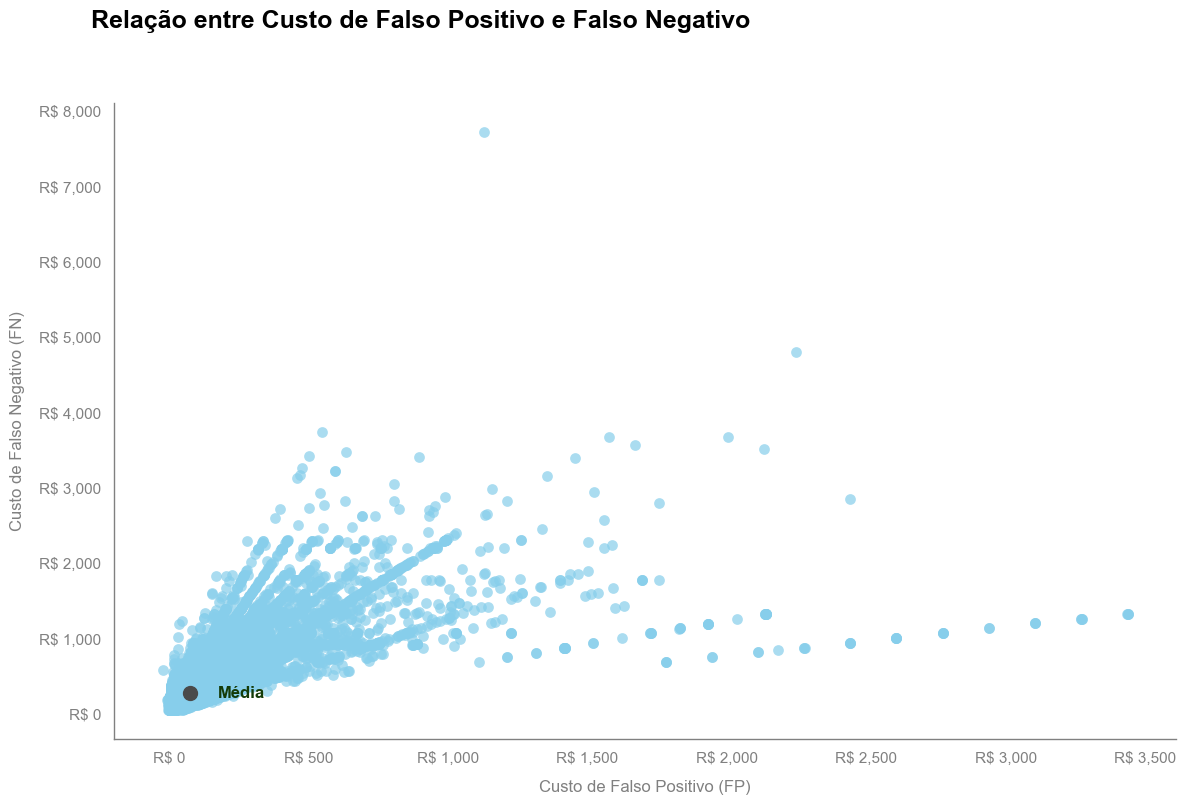

In [438]:
avg_fp = data_fpd30['custo_fp'].mean()
avg_fn = data_fpd30['custo_fn'].mean()

fig, ax = plt.subplots(figsize=(12, 8))
ax.set_facecolor('white')

sns.scatterplot(
    data=data_fpd30,
    x='custo_fp',
    y='custo_fn',
    ax=ax,
    color='#87CEEB', 
    alpha=0.7,
    s=60, 
    linewidth=0
)

ax.plot(avg_fp, avg_fn, 'o', color='#4A4A4A', markersize=10, label='Média')
ax.text(avg_fp + 100, avg_fn, 'Média', color="#143B08", fontsize=12, va='center', fontweight='bold')


ax.grid(axis='y', linestyle='--', alpha=0.6)
ax.grid(axis='x', linestyle='') 
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color('grey')
ax.spines['bottom'].set_color('grey')

fig.suptitle(
    "Relação entre Custo de Falso Positivo e Falso Negativo",
    fontsize=18,
    fontweight='bold',
    y=1.0,
    x=0.08,
    ha='left',
    color='black'
)

ax.set_xlabel("Custo de Falso Positivo (FP)", fontsize=12, color='grey', labelpad=10)
ax.set_ylabel("Custo de Falso Negativo (FN)", fontsize=12, color='grey', labelpad=10)

ax.xaxis.set_major_formatter(mticker.StrMethodFormatter('R$ {x:,.0f}'))
ax.yaxis.set_major_formatter(mticker.StrMethodFormatter('R$ {x:,.0f}'))
plt.xticks(color='grey')
plt.yticks(color='grey')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

### Sensibilidade dado o LGD / Distribuições FP e FN

c:\Users\joao.freitas\AppData\Local\anaconda3\envs\fpd30\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


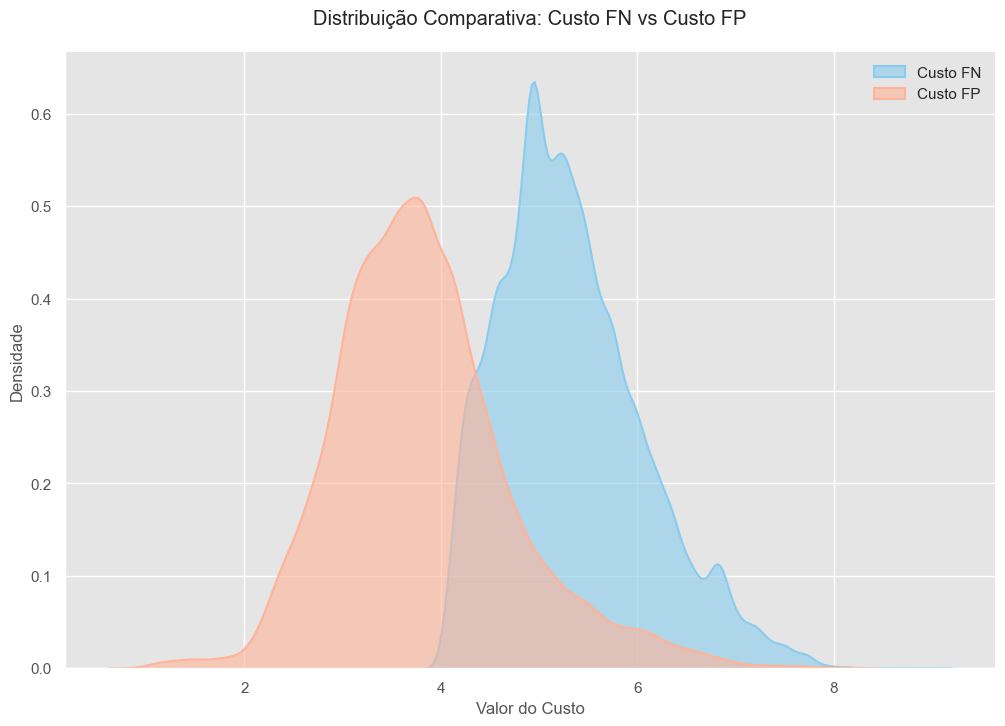

In [439]:
plt.figure(figsize=(12, 8))
sns.kdeplot(x=np.log1p(data_fpd30["custo_fn"]), 
            label="Custo FN", 
            fill=True, 
            color="#88CCEE",  
            alpha=0.6,       
            linewidth=1.5)

sns.kdeplot(x=np.log1p(data_fpd30["custo_fp"]), 
            label="Custo FP", 
            fill=True, 
            color="#FFB399", 
            alpha=0.6,
            linewidth=1.5)

plt.title("Distribuição Comparativa: Custo FN vs Custo FP", pad=20)
plt.xlabel("Valor do Custo")
plt.ylabel("Densidade")
plt.legend(frameon=False)  
sns.despine()  
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


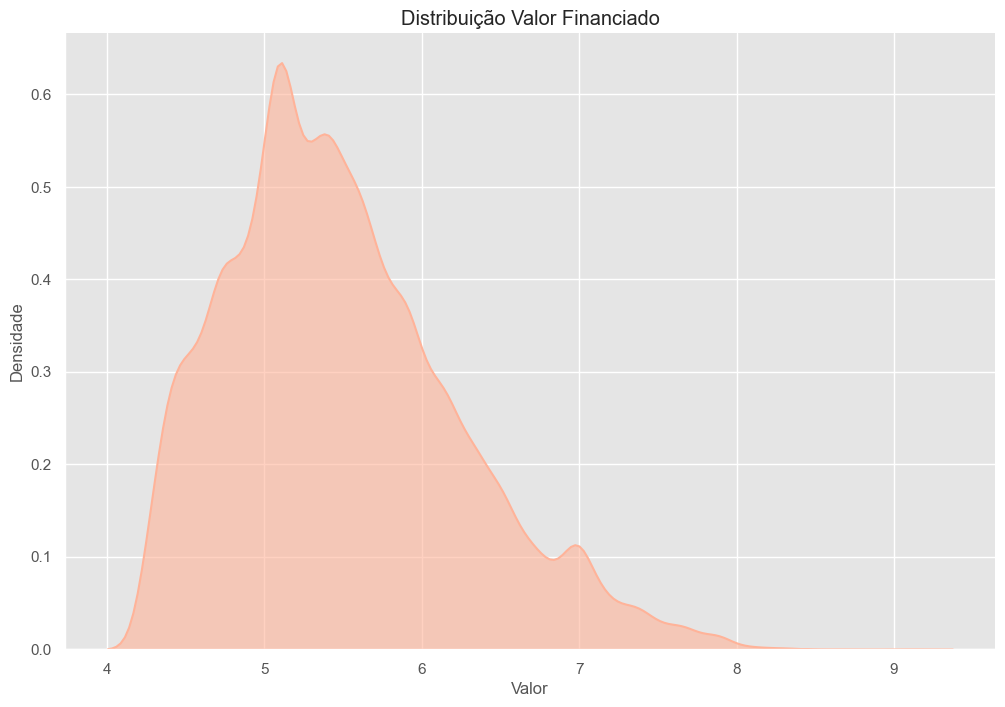

In [440]:
plt.figure(figsize=(12, 8))
sns.kdeplot(x=np.log1p(data_fpd30["valor_financiado"]), 
            fill=True, 
            color="#FFB399", 
            alpha=0.6,
            linewidth=1.5)

plt.title("Distribuição Valor Financiado")
plt.xlabel("Valor")
plt.ylabel("Densidade")
plt.legend(frameon=False)  
sns.despine()  
plt.show()

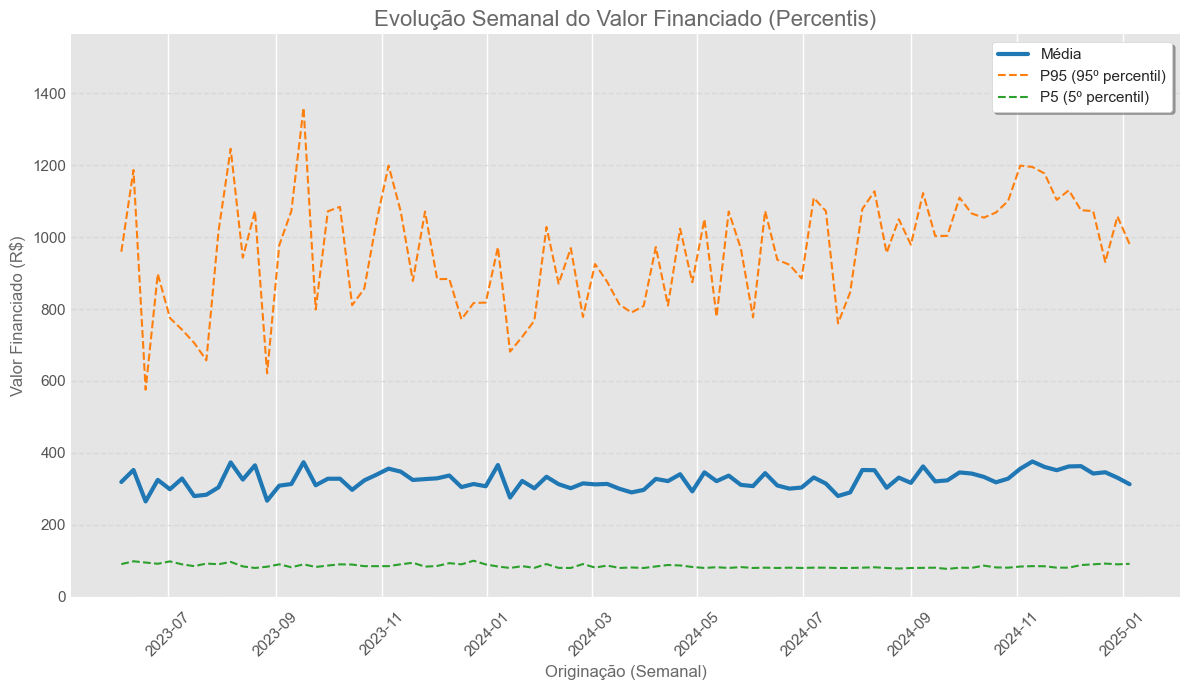

In [441]:
plt.style.use('ggplot')

df_semanal = data_fpd30.set_index('data_originacao').resample('W')['valor_financiado'].agg(
    ['mean', lambda x: x.quantile(0.05), lambda x: x.quantile(0.95)]
).reset_index()
df_semanal.columns = ['data_originacao', 'mean', 'p5', 'p95'] 

# Plotar
fig, ax = plt.subplots(figsize=(12, 7))
ax.plot(df_semanal['data_originacao'], df_semanal['mean'], color='#1f77b4', linewidth=3, label='Média')
ax.plot(df_semanal['data_originacao'], df_semanal['p95'], color='#ff7f0e', linestyle='--', label='P95 (95º percentil)')
ax.plot(df_semanal['data_originacao'], df_semanal['p5'], color='#2ca02c', linestyle='--', label='P5 (5º percentil)')

ax.set_title('Evolução Semanal do Valor Financiado (Percentis)', loc='center', fontsize=16, color='dimgray')
ax.grid(axis='y', linestyle='--', alpha=0.7, color='lightgray')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.tick_params(axis='y', length=0)

max_valor = df_semanal['p95'].max()  
ax.set_ylim(bottom=0, top=max_valor * 1.15)  

ax.tick_params(axis='x', rotation=45)
ax.set_xlabel('Originação (Semanal)', fontsize=12, color='dimgray')
ax.set_ylabel('Valor Financiado (R$)', fontsize=12, color='dimgray')

# Adicionando a legenda
ax.legend(loc='upper right', frameon=True, shadow=True, facecolor='white', edgecolor='lightgray')

plt.tight_layout()
plt.show()

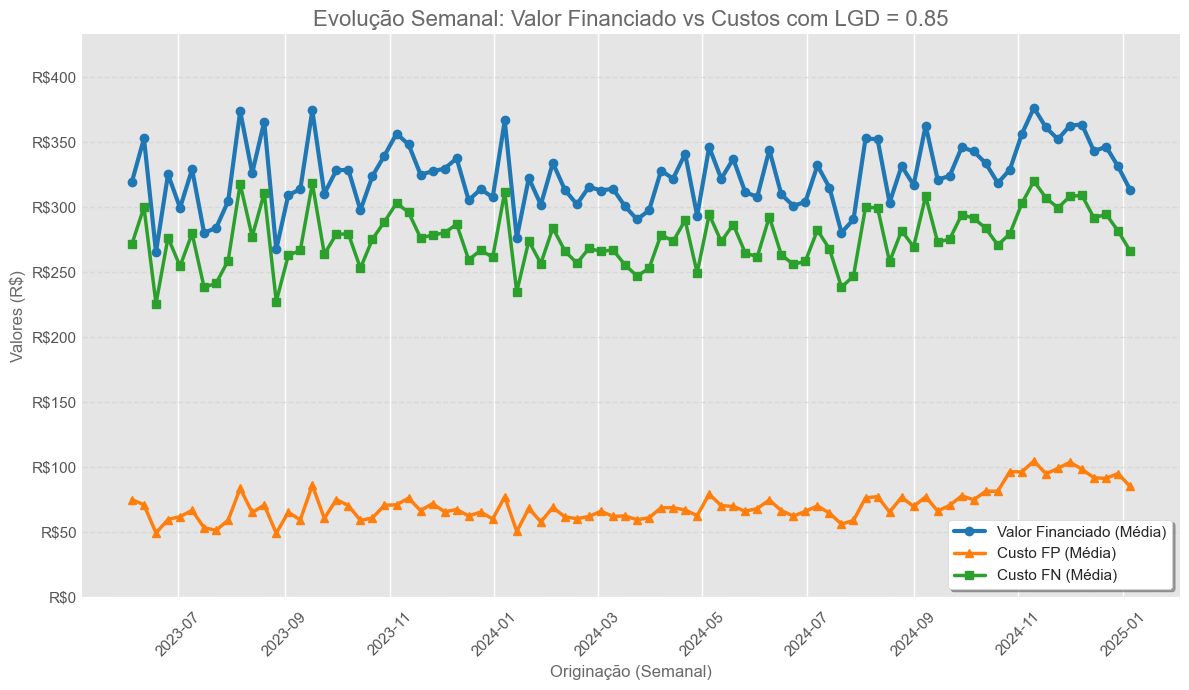

In [442]:
df_semanal = data_fpd30.set_index('data_originacao').resample('W')[['valor_financiado', 'custo_fp', 'custo_fn']].mean().reset_index()

fig, ax = plt.subplots(figsize=(12, 7))

ax.plot(df_semanal['data_originacao'], df_semanal['valor_financiado'], 
        color='#1f77b4', linewidth=3, marker='o', markersize=6, label='Valor Financiado (Média)')

ax.plot(df_semanal['data_originacao'], df_semanal['custo_fp'], 
        color='#ff7f0e', linewidth=2.5, linestyle='-', marker='^', markersize=6, label='Custo FP (Média)')

ax.plot(df_semanal['data_originacao'], df_semanal['custo_fn'], 
        color='#2ca02c', linewidth=2.5, linestyle='-', marker='s', markersize=6, label='Custo FN (Média)')

ax.set_title('Evolução Semanal: Valor Financiado vs Custos com LGD = 0.85', loc='center', fontsize=16, color='dimgray')
ax.grid(axis='y', linestyle='--', alpha=0.7, color='lightgray')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.tick_params(axis='y', length=0)

max_valor = max(df_semanal['valor_financiado'].max(), 
                df_semanal['custo_fp'].max(), 
                df_semanal['custo_fn'].max())
ax.set_ylim(bottom=0, top=max_valor * 1.15)

ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, pos: f'R${x:,.0f}'))

ax.tick_params(axis='x', rotation=45)
ax.set_xlabel('Originação (Semanal)', fontsize=12, color='dimgray')
ax.set_ylabel('Valores (R$)', fontsize=12, color='dimgray')

ax.legend(loc='best', frameon=True, shadow=True, facecolor='white', edgecolor='lightgray')

plt.tight_layout()
plt.show()

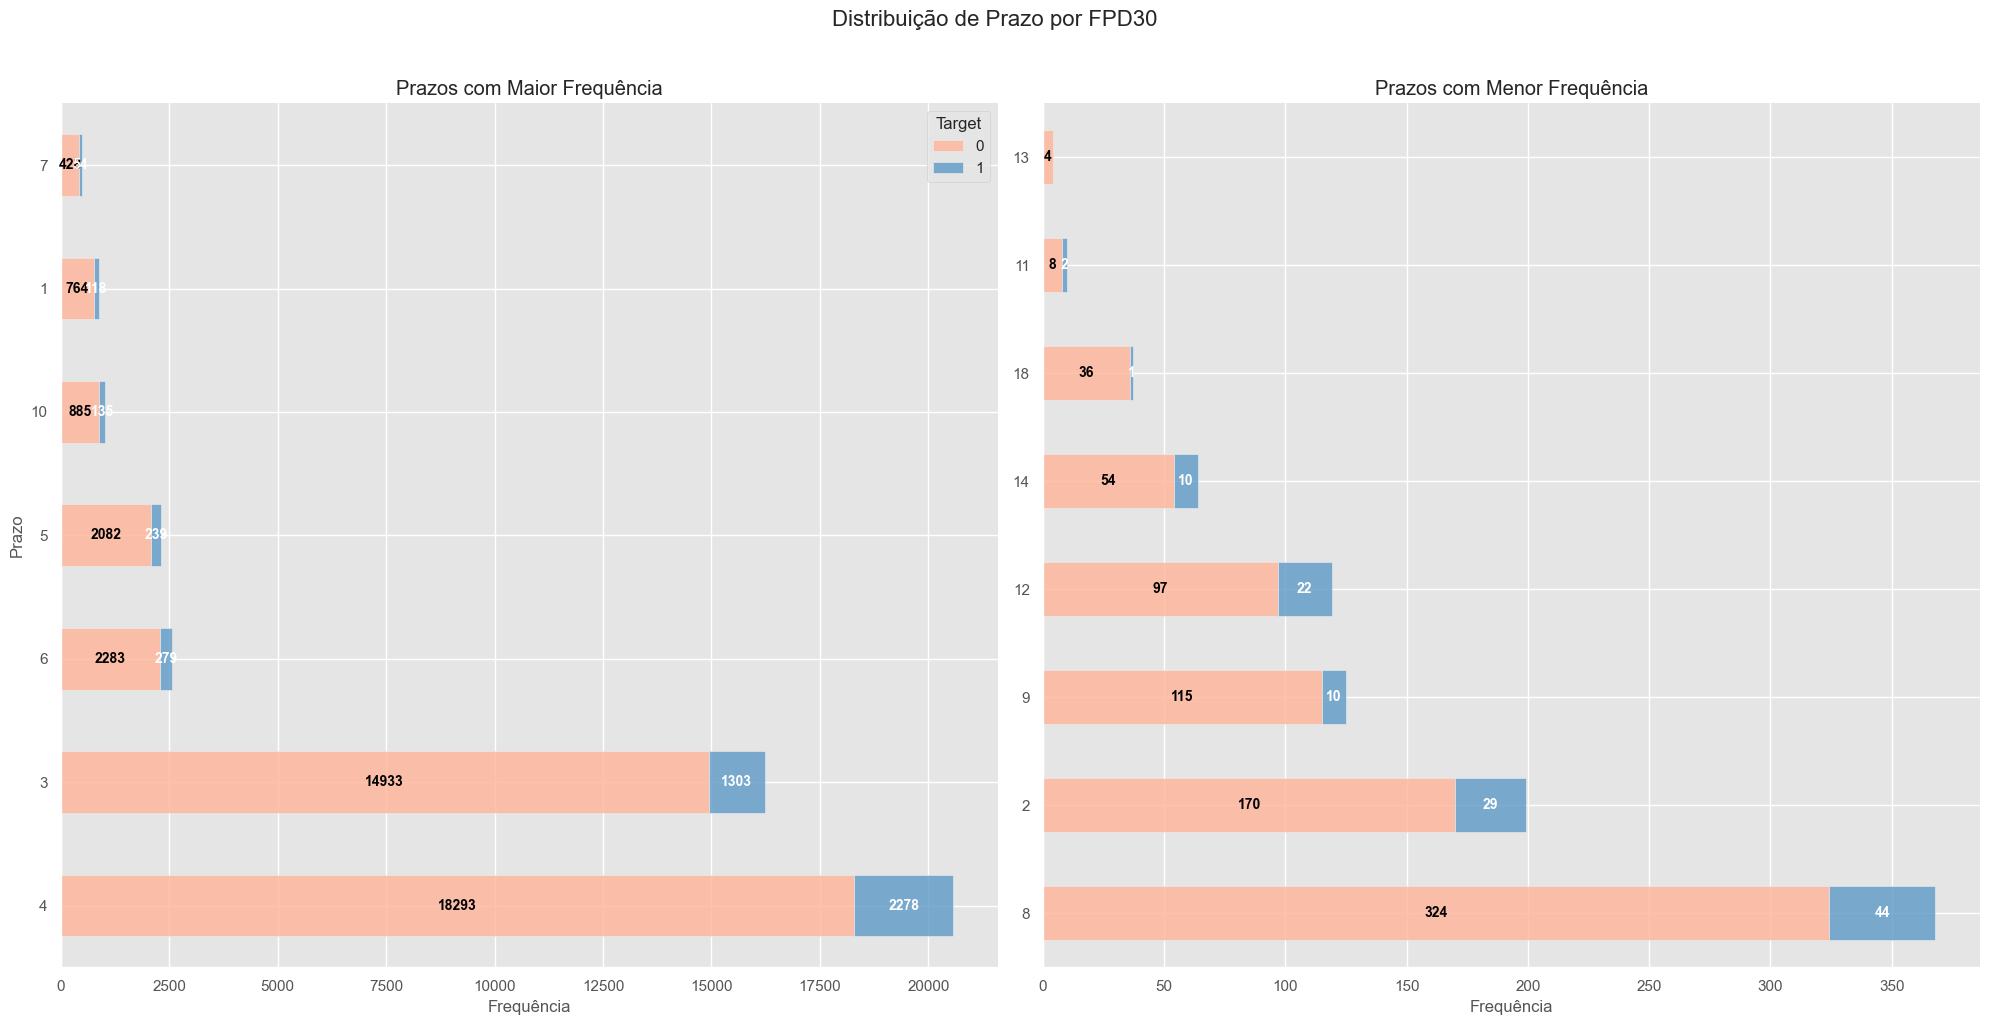

In [443]:
cross_tab = pd.crosstab(
    index=data_fpd30["prazo"], 
    columns=data_fpd30["target"]
)

total_por_prazo = cross_tab.sum(axis=1)

cross_tab = cross_tab.loc[total_por_prazo.sort_values(ascending=False).index]

cross_tab.index = cross_tab.index.astype(str)

n = len(cross_tab)
top_half = cross_tab.head(n//2)      
bottom_half = cross_tab.tail(n - n//2) 

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10), sharey=False)
fig.suptitle("Distribuição de Prazo por FPD30", fontsize=16, y=1.02)

ax1 = top_half.plot(
    kind='barh',
    stacked=True,
    color=["#FFB399", "#5D99C6"],
    alpha=0.8,
    ax=ax1
)
ax1.set_title("Prazos com Maior Frequência")
ax1.set_xlabel("Frequência")
ax1.set_ylabel("Prazo")
ax1.legend(title="Target", labels=["0", "1"])

for i, (prazo, values) in enumerate(top_half.iterrows()):
    left = 0
    for target, count in values.items():
        if count > 0:
            ax1.text(
                left + count/2,
                i,
                str(count),
                ha='center',
                va='center',
                color='white' if target == 1 else 'black',
                fontweight='bold',
                fontsize=10
            )
        left += count

ax2 = bottom_half.plot(
    kind='barh',
    stacked=True,
    color=["#FFB399", "#5D99C6"],
    alpha=0.8,
    ax=ax2
)
ax2.set_title("Prazos com Menor Frequência")
ax2.set_xlabel("Frequência")
ax2.set_ylabel("")
ax2.get_legend().remove() 

for i, (prazo, values) in enumerate(bottom_half.iterrows()):
    left = 0
    for target, count in values.items():
        if count > 0:
            ax2.text(
                left + count/2,
                i,
                str(count),
                ha='center',
                va='center',
                color='white' if target == 1 else 'black',
                fontweight='bold',
                fontsize=10
            )
        left += count

sns.despine()
plt.tight_layout()
plt.show()

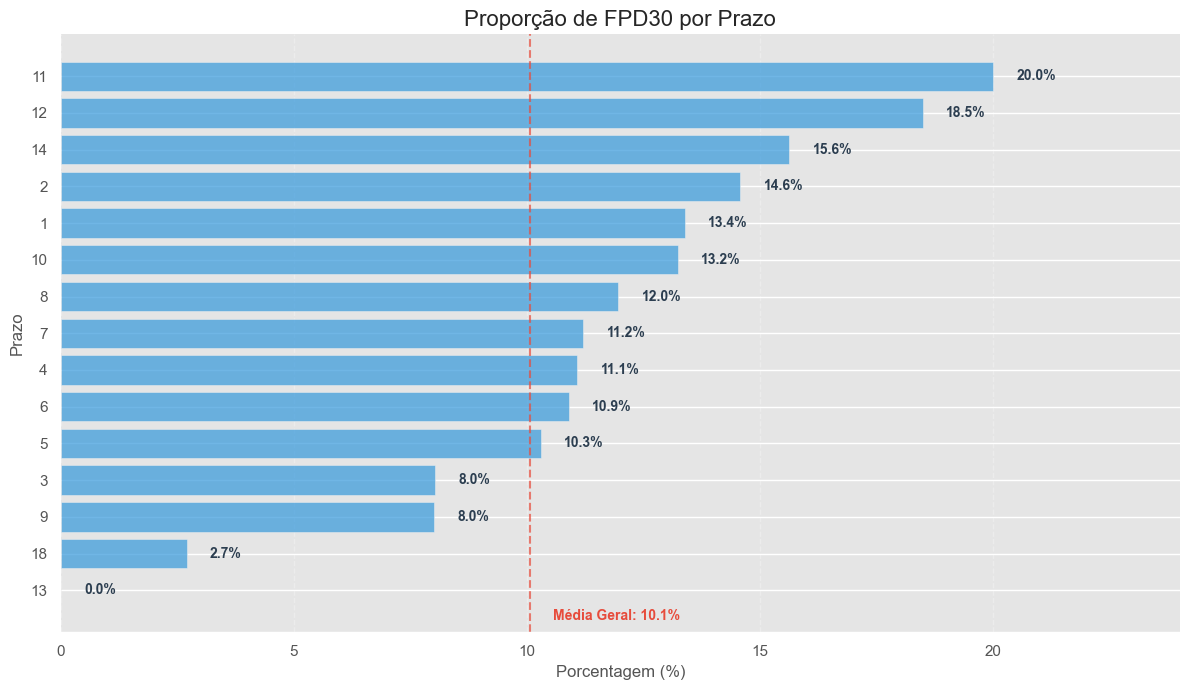

In [444]:
porcentagens = (cross_tab[1] / cross_tab.sum(axis=1)) * 100
porcentagens = porcentagens.sort_values(ascending=False)

plt.figure(figsize=(12, 7))
ax = plt.subplot()

bars = ax.barh(
    y=porcentagens.index.astype(str),
    width=porcentagens.values,
    color='#3498db',
    alpha=0.7
)

for i, (prazo, perc) in enumerate(porcentagens.items()):
    ax.text(
        perc + 0.5,  
        i,            
        f'{perc:.1f}%',
        va='center',
        ha='left',
        fontsize=10,
        fontweight='bold',
        color='#2c3e50'
    )

media_geral = (cross_tab[1].sum() / cross_tab.sum().sum()) * 100
ax.axvline(media_geral, color='#e74c3c', linestyle='--', alpha=0.7)
ax.text(
    media_geral + 0.5, 
    len(porcentagens) - 0.5, 
    f'Média Geral: {media_geral:.1f}%', 
    color='#e74c3c',
    fontweight='bold',
    ha='left',
    va='top'
)

plt.title('Proporção de FPD30 por Prazo', fontsize=16)
plt.xlabel('Porcentagem (%)', fontsize=12)
plt.ylabel('Prazo', fontsize=12)
plt.xlim(0, min(100, porcentagens.max() * 1.2))

plt.gca().invert_yaxis()
ax.xaxis.grid(True, linestyle='--', alpha=0.3)

sns.despine(left=True)
plt.tight_layout()
plt.show()

## Variáveis Categóricas

In [445]:
data_fpd30["id_varejo"].value_counts()[:15]

id_varejo
157     15357
27       4729
168      2438
104      1352
1        1171
647      1111
38       1050
95       1043
229       950
50        941
172       912
5         839
48        684
125       634
1101      591
Name: count, dtype: int64

In [446]:
data_fpd30["id_varejo"].nunique()

394

In [447]:
data_fpd30["estado"].value_counts() 

estado
AM    29300
PA     6536
BA     3270
PR     2244
RR     1824
ES      437
SP      431
RO      219
GO      208
PE      180
DF      178
SC       86
AP       38
MG       19
AC       15
RS       11
CE        2
TO        1
SE        1
Name: count, dtype: int64

In [448]:
data_fpd30["tipo_cliente"].value_counts() 

tipo_cliente
Recorrente             36224
Same Day                6161
30+_days_conversion     1589
30_days_conversion      1024
Erro                       2
Name: count, dtype: int64

In [449]:
data_fpd30[data_fpd30['tipo_cliente'] == 'Erro'] # Não remover

,data_originacao,id_contrato,id_varejo,identificador_cliente,valor_financiado,prazo,juros_operacao,data_vencimento,data_pagamento,num_parcela,valor_parcela,valor_pago,tipo_cliente,estado,ano_originacao,data_limite_fpd30,dias_atraso,target,LGD,custo_fn,custo_fp
96926,2023-09-25,727802,15,10972065,116.39,3,0.11,2023-10-25,2023-10-05,1,47.29,44.22,Erro,AM,2023,2023-11-24,-20,0,0.85,98.93,25.48
105746,2024-03-13,1054604,344,13232983,160.86,4,0.08,2024-04-13,2024-07-15,1,48.12,62.83,Erro,BA,2024,2024-05-13,93,1,0.85,136.73,31.64


In [450]:
data_fpd30['tipo_cliente'] = data_fpd30['tipo_cliente'].replace('Erro', 'Outros')

In [451]:
# Clipar os custos para modelagem -> será implementado na feature_engineering
limiar_custo_fn = data_fpd30['custo_fn'].quantile(0.95)
limiar_custo_fp = data_fpd30['custo_fp'].quantile(0.95)

print(f"Limiar para 'custo_fn' de alto valor (P95): {limiar_custo_fn:.2f}")
print(f"Limiar para 'custo_fp' de alto valor (P95): {limiar_custo_fp:.2f}\n")

data_fpd30['flg_alto_valor'] = (
    (data_fpd30['custo_fn'] > limiar_custo_fn) | 
    (data_fpd30['custo_fp'] > limiar_custo_fp)
).astype(int)

data_fpd30['custo_fn'] = data_fpd30['custo_fn'].clip(upper=limiar_custo_fn)
data_fpd30['custo_fp'] = data_fpd30['custo_fp'].clip(upper=limiar_custo_fp)

# Exemplo de verificação
print("Contagem de clientes marcados como 'alto valor':")
print(data_fpd30['flg_alto_valor'].value_counts())

Limiar para 'custo_fn' de alto valor (P95): 879.68
Limiar para 'custo_fp' de alto valor (P95): 249.67

Contagem de clientes marcados como 'alto valor':
flg_alto_valor
0    42102
1     2898
Name: count, dtype: int64
